

 -------------------- 


TASK 1: First few rows of the DataFrame: 

             Регіон  1950  1960  1970  1990  2000  2012 2014 2019
0              Крим   230   206   160   130    73   126    —    —
1         Вінницька   224   192   142   124    84   112  109   76
2         Волинська   247   250   179   153   112   148  141  101
3  Дніпропетровська   204   204   151   123    71   112  111   71
4          Донецька   271   214   140   109    61    98   82    —


 -------------------- 


TASK 2: Number of rows and columns in the DataFrame: 

(28, 9)


 -------------------- 


TASK 3: Replace dash symbol with NaN values: 

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим   230   206   160   130    73   126  <NA>  <NA>
1         Вінницька   224   192   142   124    84   112   109    76
2         Волинська   247   250   179   153   112   148   141   101
3  Дніпропетровська   204   204   151   123    71   112   111    71
4          Донецька   271   21

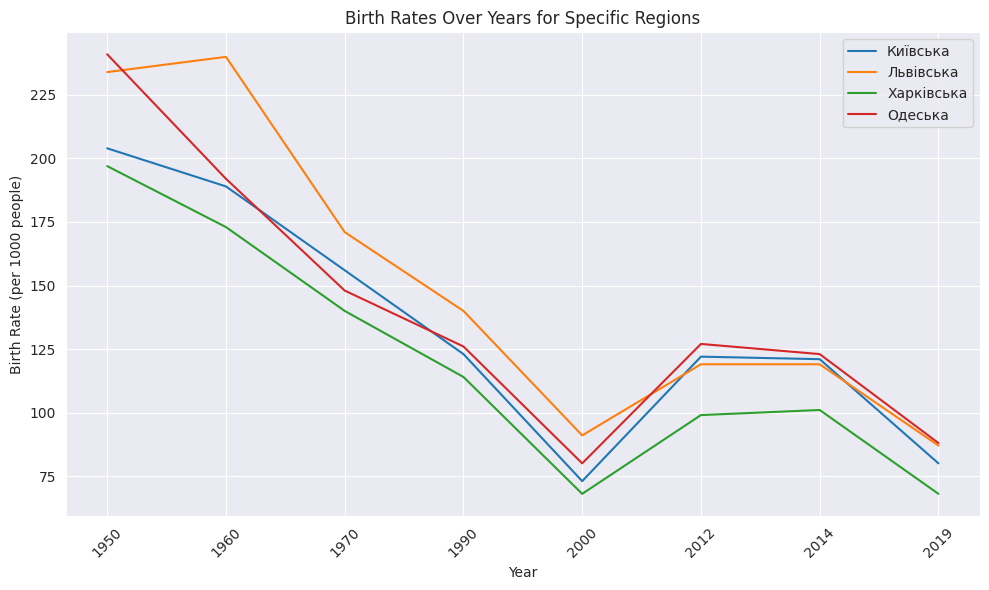


2. Horizontal Bar Charts of Birth Rates Over the Years for Each Region 



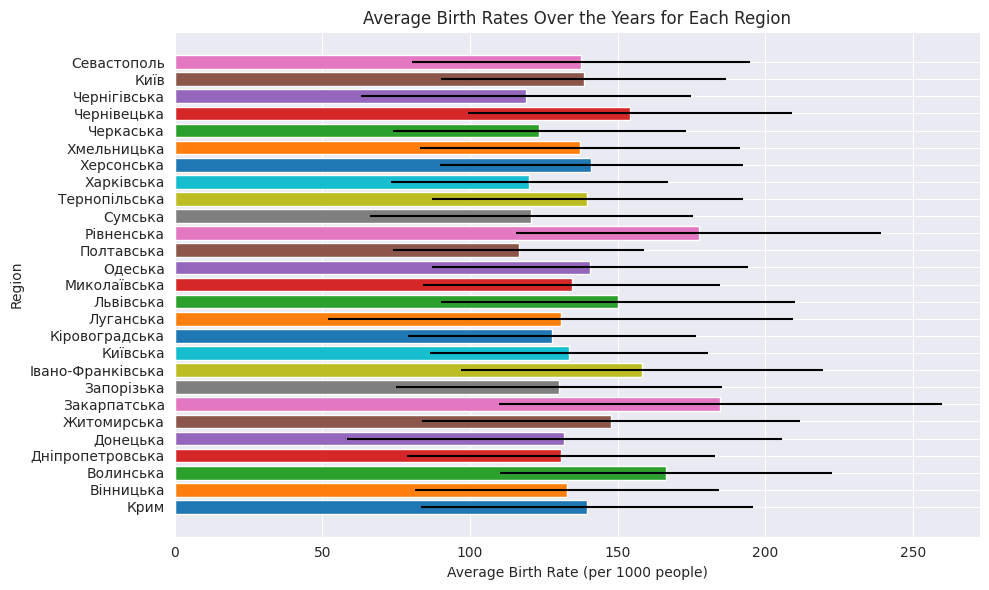

3. Plot of Birth Rates in 2014 vs 2019 



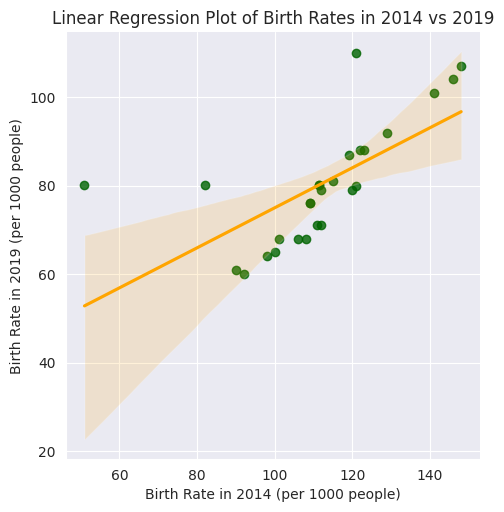

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


# Set display options
pd.set_option(
    "display.float_format", lambda x: "%.0f" % x
)  # Sets precision to 2 decimal places
pd.set_option("display.max_columns", None)  # Displays all columns without truncation


# Read the data
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url)
# print(tables)

# Extract the required table
# Unable to get table with id "collapsibleTable4" - error occurs
df = tables[12]

# 1 - Display the first few rows of the DataFrame
print("\n\n", "-" * 20, "\n\n")
print("TASK 1: First few rows of the DataFrame: \n")
print(df.head())

# 2 - Determine the number of rows and columns in the DataFrame
print("\n\n", "-" * 20, "\n\n")
print("TASK 2: Number of rows and columns in the DataFrame: \n")
print(df.shape)

# 3 - Replace dash symbol with NaN values
print("\n\n", "-" * 20, "\n\n")
print("TASK 3: Replace dash symbol with NaN values: \n")
df.replace("—", pd.NA, inplace=True)
print(df.head())

# 4 - Determine the data types of all columns
print("\n\n", "-" * 20, "\n\n")
print("TASK 4: Data types of all columns: \n")
print(df.dtypes)

# 5 - Convert non-numeric columns to numeric where dash symbol was present
print("\n\n", "-" * 20, "\n\n")
print(
    "TASK 5: Convert non-numeric columns to numeric where dash symbol was present: \n"
)
numeric_columns = df.columns[1:]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")
print(df.head())

# 6 - Calculate the proportion of missing values in each column
missing_proportion = df.isnull().mean()
print("\n\n", "-" * 20, "\n\n")
print("TASK 6: Proportion of missing values in each column: \n")
print(missing_proportion)


# 7 - Remove the row containing data for the entire country
print("\n\n", "-" * 20, "\n\n")
print("TASK 7: Remove the row containing data for the entire country: \n")
df = df.drop(df[df["Регіон"] == "Україна"].index)
print(df)


# 8 - Replace missing values in columns with the mean of the respective columns
print("\n\n", "-" * 20, "\n\n")
print(
    "TASK 8: Replace missing values in columns with the mean of the respective columns: \n"
)
df.iloc[:, 1:] = df.iloc[:, 1:].fillna(df.iloc[:, 1:].mean())
print(df)


# 9 - Get list of regions where the birth rate in 2019 was higher than the national average
# Replace NaN values with a very low number to ensure they don't affect the comparison
print("\n\n", "-" * 20, "\n\n")
print(
    "TASK 9: List of regions where the birth rate in 2019 was higher than the national average: \n"
)
df_filled = df.fillna(-1)
# Calculate the mean of birth rates in 2019
mean_birth_rate_2019 = df["2019"].mean()
# Filter the DataFrame to get regions with birth rate in 2019 higher than the national average
regions_higher_than_avg_2019 = df_filled[df_filled["2019"] > mean_birth_rate_2019][
    "Регіон"
].tolist()
print(regions_higher_than_avg_2019)


# 10 - Find the region with the highest birth rate in 2014
print("\n\n", "-" * 20, "\n\n")
print("TASK 10: Region with the highest birth rate in 2014: \n")
df_filled = df.fillna(-1)  # or any placeholder value that won't affect the comparison
# Find the index of the row with the highest birth rate in 2014
highest_birth_rate_index_2014 = df_filled["2014"].idxmax()
# Get the region with the highest birth rate in 2014
region_with_highest_birth_rate_2014 = df.loc[highest_birth_rate_index_2014]["Регіон"]
print(region_with_highest_birth_rate_2014)
print("\n\n", "-" * 20, "\n\n")

# 11 - VIZUALIZATION
print("VIZUALIZATION")
print("\n\n", "-" * 20, "\n\n")

# Line Plot of Birth Rates Over Years for Specific Regions
print("1. Line Plot of Birth Rates Over Years for Specific Regions \n")
plt.figure(figsize=(10, 6))
regions_to_plot = ["Київська", "Львівська", "Харківська", "Одеська"]
for region in regions_to_plot:
    plt.plot(
        df.columns[1:],
        df.loc[df["Регіон"] == region].iloc[:, 1:].values.flatten(),
        label=region,
    )
plt.title("Birth Rates Over Years for Specific Regions")
plt.xlabel("Year")
plt.ylabel("Birth Rate (per 1000 people)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print()


#  Convert the columns representing years to numeric
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')

# Horizontal Bar Charts of Birth Rates Over the Years for Each Region
print("2. Horizontal Bar Charts of Birth Rates Over the Years for Each Region \n")
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    # Convert years and birth rates to numeric
    years = pd.to_numeric(df.columns[1:])
    birth_rates = pd.to_numeric(row[1:])

    # Fit polynomial regression
    z = np.polyfit(x=years, y=birth_rates, deg=3)
    p = np.poly1d(z)

    # Plot horizontal bar chart
    plt.barh(row["Регіон"], birth_rates.mean(), xerr=birth_rates.std(), label=row["Регіон"])
plt.title("Average Birth Rates Over the Years for Each Region")
plt.xlabel("Average Birth Rate (per 1000 people)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


# Plot of Birth Rates in 2014 vs 2019
print("3. Plot of Birth Rates in 2014 vs 2019 \n")
sns.set_style("darkgrid")
sns.lmplot(
    x="2014",
    y="2019",
    data=df,
    scatter_kws={"color": "darkgreen"},
    line_kws={"color": "orange"},
)
plt.title("Linear Regression Plot of Birth Rates in 2014 vs 2019")
plt.xlabel("Birth Rate in 2014 (per 1000 people)")
plt.ylabel("Birth Rate in 2019 (per 1000 people)")
plt.show()
